In [8]:
import geopandas as gpd
import pandas as pd
from shapely.wkt import loads
crs = {'init': 'epsg:3857'}
df_subway = gpd.read_file('SubwayEntrances.geojson', geometry="geometry", crs=crs)

In [10]:
df_subway

,line,name,objectid,url,geometry
0,2-5,Birchall Ave & Sagamore St at NW corner,1734,http://web.mta.info/nyct/service/,POINT (-73.86836 40.84917)
1,2-5,Birchall Ave & Sagamore St at NE corner,1735,http://web.mta.info/nyct/service/,POINT (-73.86821 40.84913)
2,2-5,Morris Park Ave & 180th St at NW corner,1736,http://web.mta.info/nyct/service/,POINT (-73.87350 40.84122)
3,2-5,Morris Park Ave & 180th St at NW corner,1737,http://web.mta.info/nyct/service/,POINT (-73.87289 40.84145)
4,2-5,Boston Rd & 178th St at SW corner,1738,http://web.mta.info/nyct/service/,POINT (-73.87962 40.84082)
...,...,...,...,...,...
1923,Q,2nd Ave & bet 83rd & 84th St,1928,http://web.mta.info/nyct/service/,POINT (-73.95281 40.77619)
1924,Q,2nd Ave & 96th St at SW corner,1929,http://web.mta.info/nyct/service/,POINT (-73.94747 40.78410)
1925,Q,2nd Ave & 95th St at NW corner,1930,http://web.mta.info/nyct/service/,POINT (-73.94762 40.78392)
1926,Q,2nd Ave & 94th St at NE corner,1931,http://web.mta.info/nyct/service/,POINT (-73.94773 40.78292)


In [12]:
df_block = pd.read_csv('mh_per_bloc_geodata.csv')
geometry = df_block['geometry'].apply(lambda x: loads(x))
df_block['geometry'] = geometry
df_block = gpd.GeoDataFrame(df_block, crs=crs, geometry=df_block['geometry'])
df_block.head()

/Users/yy/opt/anaconda3/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,geometry,tesctyscor,priority,core_m,asthma,area,tc_gap,tes,geoid,total_pop,...,pctpov,county,ment_hlth,tc_goal,medhhinc,core_norm,popadjust,biome,ua_name,incorpname
0,"POLYGON ((-73.711 40.749, -73.713 40.750, -73....",92.740431,0.283085,24.6,8.2,0.264992,0.111677,93.413756,360811551024,1631,...,0.088903,Queens County,9.5,-1,79873,0.637951,0.8,Forest,"New York--Newark, NY--NJ--CT",New York
1,"POLYGON ((-73.713 40.752, -73.713 40.752, -73....",92.740431,0.257680,24.6,8.2,0.132213,0.000000,100.000000,360811551026,1310,...,0.090840,Queens County,9.5,-1,87647,0.637951,0.5,Forest,"New York--Newark, NY--NJ--CT",New York
2,"POLYGON ((-73.719 40.752, -73.719 40.752, -73....",92.740431,0.290920,24.6,8.2,0.145344,0.000000,100.000000,360811551025,1573,...,0.199619,Queens County,9.5,-1,98083,0.637951,0.5,Forest,"New York--Newark, NY--NJ--CT",New York
3,"POLYGON ((-73.720 40.749, -73.720 40.750, -73....",92.740431,0.214914,24.6,8.2,0.222899,0.035324,98.418410,360811551021,1277,...,0.163665,Queens County,9.5,-1,82656,0.637951,0.8,Forest,"New York--Newark, NY--NJ--CT",New York
4,"POLYGON ((-73.708 40.749, -73.707 40.750, -73....",92.740431,0.257289,24.6,8.2,0.441533,0.172403,90.758892,360811551023,1822,...,0.092455,Queens County,9.5,-1,134663,0.637951,0.8,Forest,"New York--Newark, NY--NJ--CT",New York


we need to compare two geometry point and give the distance

In [13]:
import haversine as hs
from haversine import Unit
import geopy.distance
import numpy as np

In [87]:
df_block['dist_to_subway'] = np.zeros(df_block.shape[0])
df_block.columns

Index(['geometry', 'tesctyscor', 'priority', 'core_m', 'asthma', 'area',
       'tc_gap', 'tes', 'geoid', 'total_pop', 'bgpopdense', 'healthnorm',
       'phys_hlth', 'child_perc', 'congressio', 'core_w', 'avg_temp', 'source',
       'treecanopy', 'pctpoc', 'seniorperc', 'unemplrate', 'dep_ratio',
       'state', 'pctpov', 'county', 'ment_hlth', 'tc_goal', 'medhhinc',
       'core_norm', 'popadjust', 'biome', 'ua_name', 'incorpname',
       'dist_to_subway', 'center'],
      dtype='object')

In [28]:
df_subway.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [38]:
df_block.crs

<Derived Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [52]:
df_block_proj = df_block.to_crs(df_subway.crs)
df_block_proj.crs


<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [54]:
df_block['center'] = df_block.geometry.centroid
#4326
df_block.head()

,geometry,tesctyscor,priority,core_m,asthma,area,tc_gap,tes,geoid,total_pop,...,ment_hlth,tc_goal,medhhinc,core_norm,popadjust,biome,ua_name,incorpname,dist_to_subway,center
0,"POLYGON ((-73.711 40.749, -73.713 40.750, -73....",92.740431,0.283085,24.6,8.2,0.264992,0.111677,93.413756,360811551024,1631,...,9.5,-1,79873,0.637951,0.8,Forest,"New York--Newark, NY--NJ--CT",New York,28833.455796,POINT (-73.715 40.748)
1,"POLYGON ((-73.713 40.752, -73.713 40.752, -73....",92.740431,0.257680,24.6,8.2,0.132213,0.000000,100.000000,360811551026,1310,...,9.5,-1,87647,0.637951,0.5,Forest,"New York--Newark, NY--NJ--CT",New York,28730.060832,POINT (-73.716 40.752)
2,"POLYGON ((-73.719 40.752, -73.719 40.752, -73....",92.740431,0.290920,24.6,8.2,0.145344,0.000000,100.000000,360811551025,1573,...,9.5,-1,98083,0.637951,0.5,Forest,"New York--Newark, NY--NJ--CT",New York,28444.382545,POINT (-73.718 40.750)
3,"POLYGON ((-73.720 40.749, -73.720 40.750, -73....",92.740431,0.214914,24.6,8.2,0.222899,0.035324,98.418410,360811551021,1277,...,9.5,-1,82656,0.637951,0.8,Forest,"New York--Newark, NY--NJ--CT",New York,27836.888544,POINT (-73.724 40.751)
4,"POLYGON ((-73.708 40.749, -73.707 40.750, -73....",92.740431,0.257289,24.6,8.2,0.441533,0.172403,90.758892,360811551023,1822,...,9.5,-1,134663,0.637951,0.8,Forest,"New York--Newark, NY--NJ--CT",New York,29588.643692,POINT (-73.708 40.752)


In [74]:
for i_block in range(0,df_block.shape[0]):
    smallest = 1e9
    sm_loc_block = None
    sm_loc_sub = None
    # for i_sub in range(0, 1000):
    # i_sub in range(0, sub_station.shape[0]-1):
    for i_sub in range(0, df_subway.shape[0]):
        # print(i_block, i_sub)
        loc_block=(df_block.center[i_block].x,df_block.center[i_block].y)
        loc_sub=(df_subway.iloc[i_sub]['geometry'].x,df_subway.iloc[i_sub]['geometry'].y)
        # print(loc_block,loc_sub)
        distsq = (loc_block[0] - loc_sub[0]) ** 2 + (loc_block[1] - loc_sub[1]) ** 2
       
        if distsq < smallest:
            smallest = distsq
            sm_loc_block = loc_block
            sm_loc_sub = loc_sub
    dist = geopy.distance.geodesic(sm_loc_block,sm_loc_sub).m
    df_block['dist_to_subway'][i_block] = dist
    print(dist)

    

/var/folders/hd/0xsynk316mq_gdwpp4w9nbqw0000gn/T/ipykernel_17451/2044774899.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_block['dist_to_subway'][i_block] = dist


7612.683567711018
7503.83629742225
7218.67669614276
6607.6310692627385
8367.004015418597
7196.543996831521
7074.531928412095
6332.600058282057
6456.119545110354
6402.082575079547
8284.952533016783
8238.992657994473
8769.252002544803
8089.863092184194
4403.31242520088
4044.5600363266017
4349.793474746197
5330.271994193901
4921.042136485875
4531.643362647647
3974.428130950814
4026.774987258259
4473.459122364874
4027.5081594444205
6416.035477636345
6399.125265456007
7933.089756908987
7774.505260329248
7850.688039354703
7801.4156499514565
8024.65301993811
6093.611693270769
5628.321240195964
6245.463723177635
7696.344275211875
5078.506622928726
5277.028180656205
5563.903453545985
5530.396116206105
8762.52999937461
8810.631449469201
8715.118780422254
8635.460855901909
8675.003341338874
8691.76015493351
1812.604434778072
1729.9104259306805
3547.3445546327002
3513.929204110837
3068.9377629377173
3002.6648851526666
3767.1978231152316
5906.909610864315
4999.664426716888
4375.224772420061
4790.43

In [160]:
df_block['closest_line'] = np.zeros(df_block.shape[0])
df_block['closest_entrance_id'] = np.zeros(df_block.shape[0])

for i_block in range(0,df_block.shape[0]):
    smallest = 1e9
    sm_loc_block = None
    sm_loc_sub = None
    sm_line = None
    sm_id = None
    for i_sub in range(0, df_subway.shape[0]):
        loc_block=(df_block.center[i_block].x,df_block.center[i_block].y)
        loc_sub=(df_subway.iloc[i_sub]['geometry'].x,df_subway.iloc[i_sub]['geometry'].y)
        distsq = (loc_block[0] - loc_sub[0]) ** 2 + (loc_block[1] - loc_sub[1]) ** 2
       
        if distsq < smallest:
            smallest = distsq
            sm_loc_block = loc_block
            sm_loc_sub = loc_sub
            sm_id = df_subway.iloc[i_sub]['objectid']
            sm_line = df_subway.iloc[i_sub]['line']
    df_block['closest_line'][i_block] = sm_line
    df_block['closest_entrance_id'][i_block] = sm_id
    if i_block % 50 == 0:
        print(i_block)

/var/folders/hd/0xsynk316mq_gdwpp4w9nbqw0000gn/T/ipykernel_17451/1408041891.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_block['closest_line'][i_block] = sm_line
/var/folders/hd/0xsynk316mq_gdwpp4w9nbqw0000gn/T/ipykernel_17451/1408041891.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_block['closest_entrance_id'][i_block] = sm_id


0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200
1250
1300
1350
1400
1450
1500
1550
1600
1650
1700
1750
1800
1850
1900
1950
2000
2050
2100
2150
2200
2250
2300
2350
2400
2450
2500
2550
2600
2650
2700
2750
2800
2850
2900
2950
3000
3050
3100
3150
3200
3250
3300
3350
3400
3450
3500
3550
3600
3650
3700
3750
3800
3850
3900
3950
4000
4050
4100
4150
4200
4250
4300
4350
4400
4450
4500
4550
4600
4650
4700
4750
4800
4850
4900
4950
5000
5050
5100
5150
5200
5250
5300
5350
5400
5450
5500
5550
5600
5650
5700
5750
5800
5850
5900
5950
6000
6050
6100
6150
6200


In [161]:
df_block.head()

,geometry,tesctyscor,priority,core_m,asthma,area,tc_gap,tes,geoid,total_pop,...,medhhinc,core_norm,popadjust,biome,ua_name,incorpname,dist_to_subway,center,closest_line,closest_entrance_id
0,"POLYGON ((-73.711 40.749, -73.713 40.750, -73....",92.740431,0.283085,24.6,8.2,0.264992,0.111677,93.413756,360811551024,1631,...,79873,0.637951,0.8,Forest,"New York--Newark, NY--NJ--CT",New York,7612.683568,POINT (-73.715 40.748),F,1522
1,"POLYGON ((-73.713 40.752, -73.713 40.752, -73....",92.740431,0.257680,24.6,8.2,0.132213,0.000000,100.000000,360811551026,1310,...,87647,0.637951,0.5,Forest,"New York--Newark, NY--NJ--CT",New York,7503.836297,POINT (-73.716 40.752),F,1522
2,"POLYGON ((-73.719 40.752, -73.719 40.752, -73....",92.740431,0.290920,24.6,8.2,0.145344,0.000000,100.000000,360811551025,1573,...,98083,0.637951,0.5,Forest,"New York--Newark, NY--NJ--CT",New York,7218.676696,POINT (-73.718 40.750),F,1522
3,"POLYGON ((-73.720 40.749, -73.720 40.750, -73....",92.740431,0.214914,24.6,8.2,0.222899,0.035324,98.418410,360811551021,1277,...,82656,0.637951,0.8,Forest,"New York--Newark, NY--NJ--CT",New York,6607.631069,POINT (-73.724 40.751),F,1522
4,"POLYGON ((-73.708 40.749, -73.707 40.750, -73....",92.740431,0.257289,24.6,8.2,0.441533,0.172403,90.758892,360811551023,1822,...,134663,0.637951,0.8,Forest,"New York--Newark, NY--NJ--CT",New York,8367.004015,POINT (-73.708 40.752),F,1522


In [162]:
import dill
# # open a file, where you ant to store the data
# file = open('df_block_full.dat', 'wb')

# # dump information to that file
# dill.dump(df_block, file)

# # close the file
# file.close()

In [163]:
# open a file, where you stored the pickled data
file = open('df_block_full.dat', 'rb')

# dump information to that file
df_block = dill.load(file)

# close the file
file.close()

<AxesSubplot:>

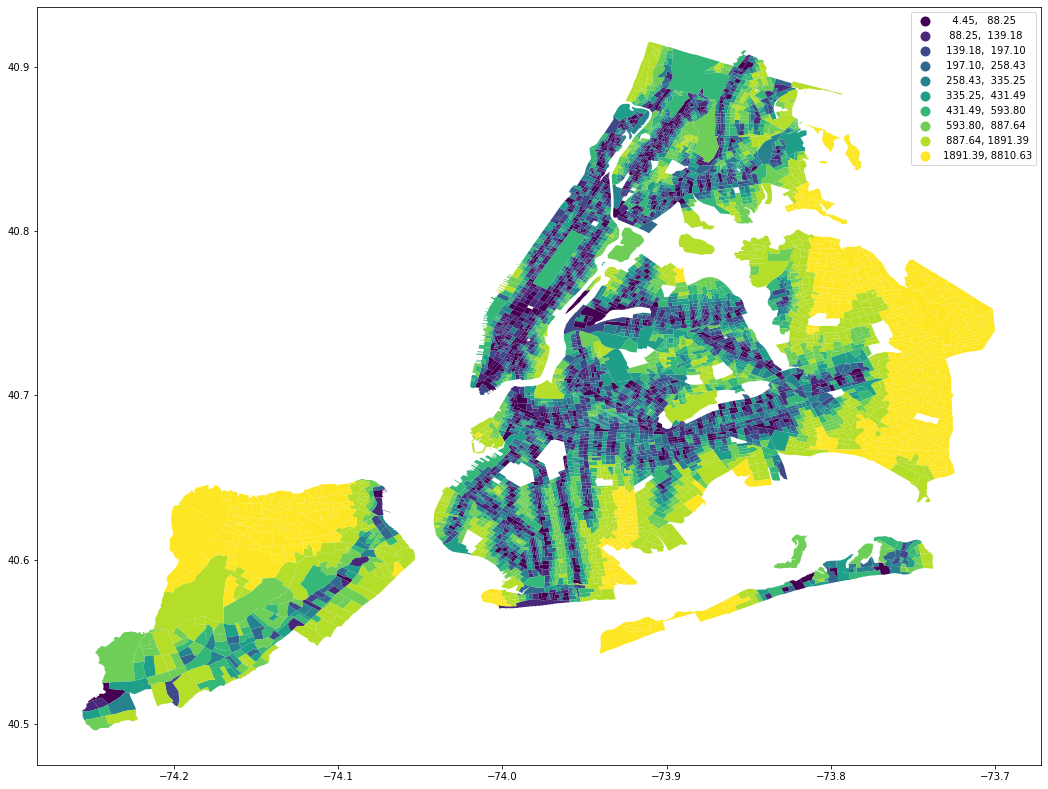

In [133]:
df_block.plot(figsize = (18,18), column = 'dist_to_subway', scheme='Quantiles', legend=True, k = 10)

In [117]:
df_block['county'].unique()

array(['Queens County', 'Kings County', 'New York County',
       'Richmond County', 'Bronx County'], dtype=object)

In [255]:

import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

/Users/yy/opt/anaconda3/lib/python3.9/site-packages/geopandas/geodataframe.py:1472: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/yy/opt/anaconda3/lib/python3.9/site-packages/geopandas/geodataframe.py:1472: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/yy/opt/anaconda3/lib/python3.9/site-packages/geopandas/geodataframe.py:1472: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

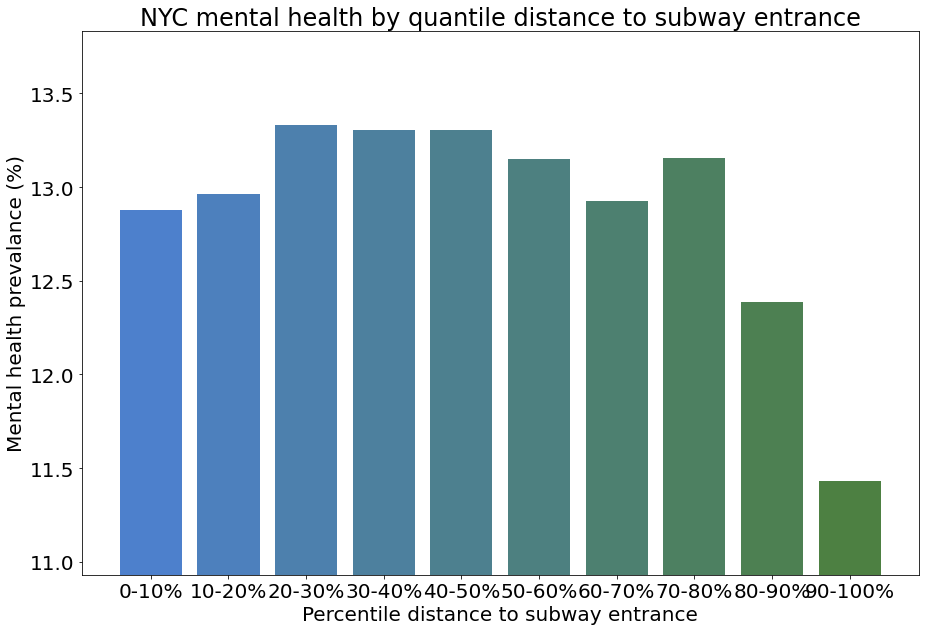

In [283]:

c  =[]
for i in range(10):
    c.append((0.3, 0.5, 0.8 - 0.06 * i))

df_block_hist = df_block[['geometry', 'dist_to_subway', 'ment_hlth', 'popadjust']].copy()
df_sort = df_block_hist.sort_values(by="dist_to_subway", ignore_index=True, ascending=True)
df_sort.shape
k = 10
interval = df_sort.shape[0] // k
data = []
x = []
for i in range(k):
    x.append(str(int(i * 100 / k)) + "-" + str(int((i+1)*100/k)) + "%")
    df_inter = df_sort[i*interval:(i+1)*interval]
    pop = df_inter.popadjust.mean()
    df_inter['ment_hlth_adj'] =  df_inter['ment_hlth'] * df_inter['popadjust'] / pop
    data.append(df_inter['ment_hlth_adj'].mean())
data


fig, ax = plt.subplots(figsize=(15,10))
ax.bar(x, data, color=c)
ax.set_ylabel('Mental health prevalance (%)')
ax.set_xlabel('Percentile distance to subway entrance')
ax.set_title('NYC mental health by quantile distance to subway entrance')
plt.rc('font', size=20)
# ax.legend(title='Fruit color')
ax.set_ylim([np.min(data) - 0.5, np.max(data) + 0.5])
plt.show()

/Users/yy/opt/anaconda3/lib/python3.9/site-packages/geopandas/geodataframe.py:1472: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/yy/opt/anaconda3/lib/python3.9/site-packages/geopandas/geodataframe.py:1472: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/yy/opt/anaconda3/lib/python3.9/site-packages/geopandas/geodataframe.py:1472: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

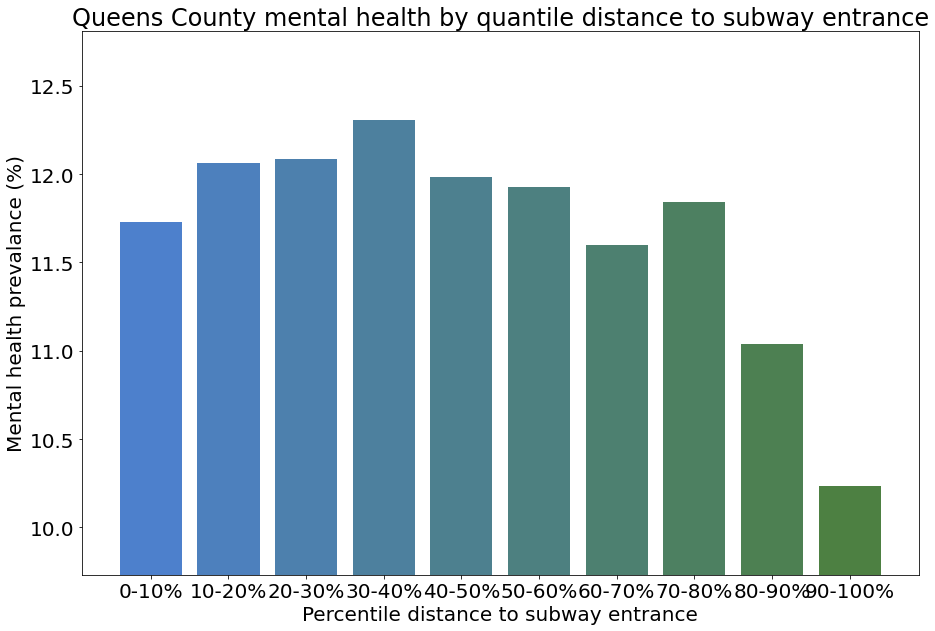

/Users/yy/opt/anaconda3/lib/python3.9/site-packages/geopandas/geodataframe.py:1472: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/yy/opt/anaconda3/lib/python3.9/site-packages/geopandas/geodataframe.py:1472: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/yy/opt/anaconda3/lib/python3.9/site-packages/geopandas/geodataframe.py:1472: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

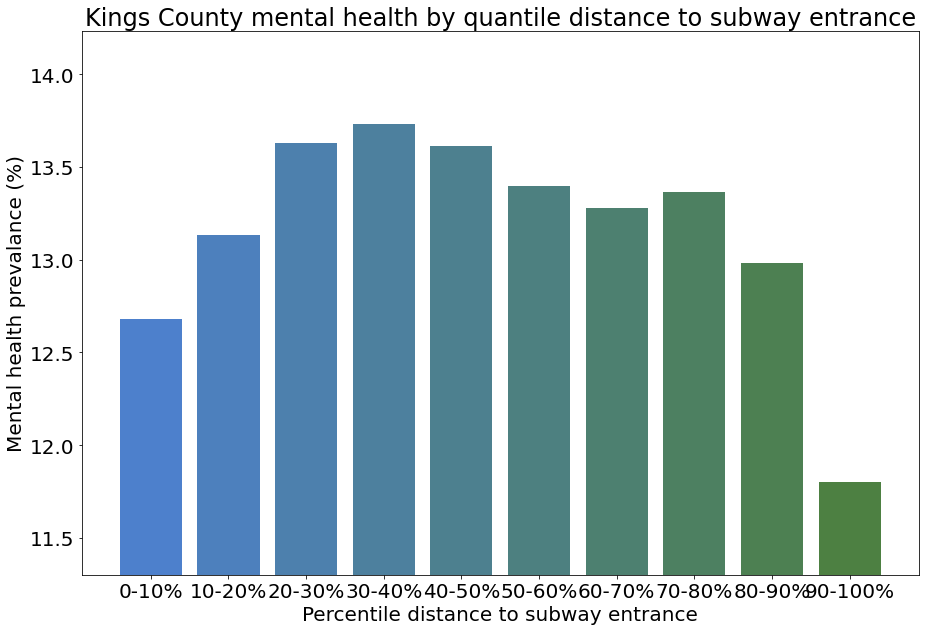

/Users/yy/opt/anaconda3/lib/python3.9/site-packages/geopandas/geodataframe.py:1472: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/yy/opt/anaconda3/lib/python3.9/site-packages/geopandas/geodataframe.py:1472: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/yy/opt/anaconda3/lib/python3.9/site-packages/geopandas/geodataframe.py:1472: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

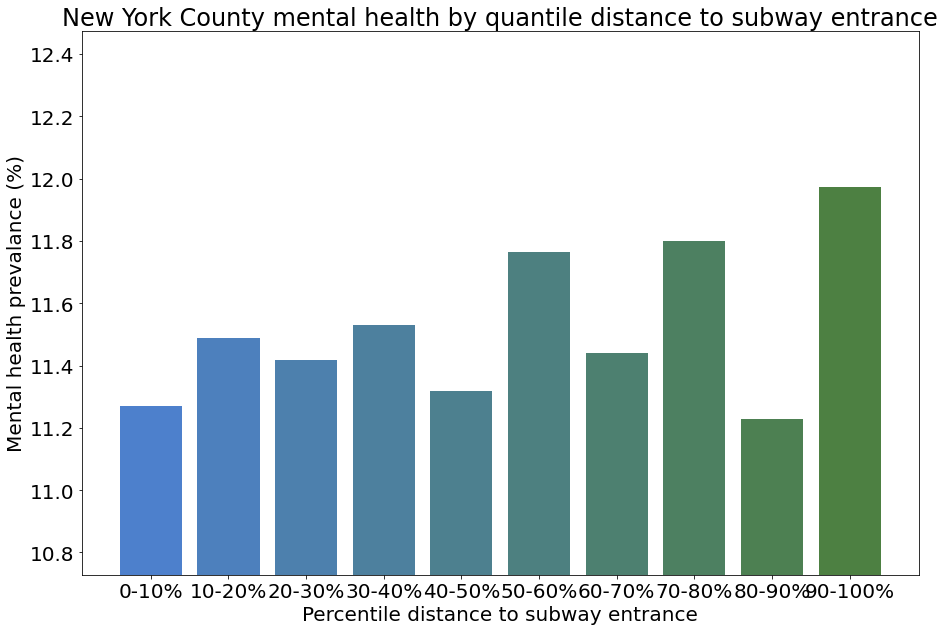

/Users/yy/opt/anaconda3/lib/python3.9/site-packages/geopandas/geodataframe.py:1472: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/yy/opt/anaconda3/lib/python3.9/site-packages/geopandas/geodataframe.py:1472: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/yy/opt/anaconda3/lib/python3.9/site-packages/geopandas/geodataframe.py:1472: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

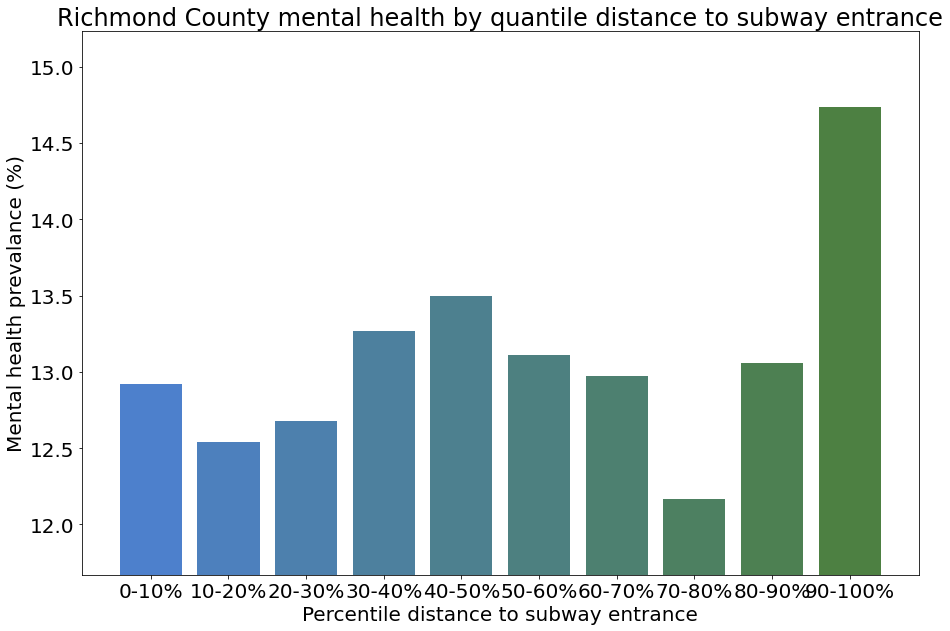

/Users/yy/opt/anaconda3/lib/python3.9/site-packages/geopandas/geodataframe.py:1472: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/yy/opt/anaconda3/lib/python3.9/site-packages/geopandas/geodataframe.py:1472: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/yy/opt/anaconda3/lib/python3.9/site-packages/geopandas/geodataframe.py:1472: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

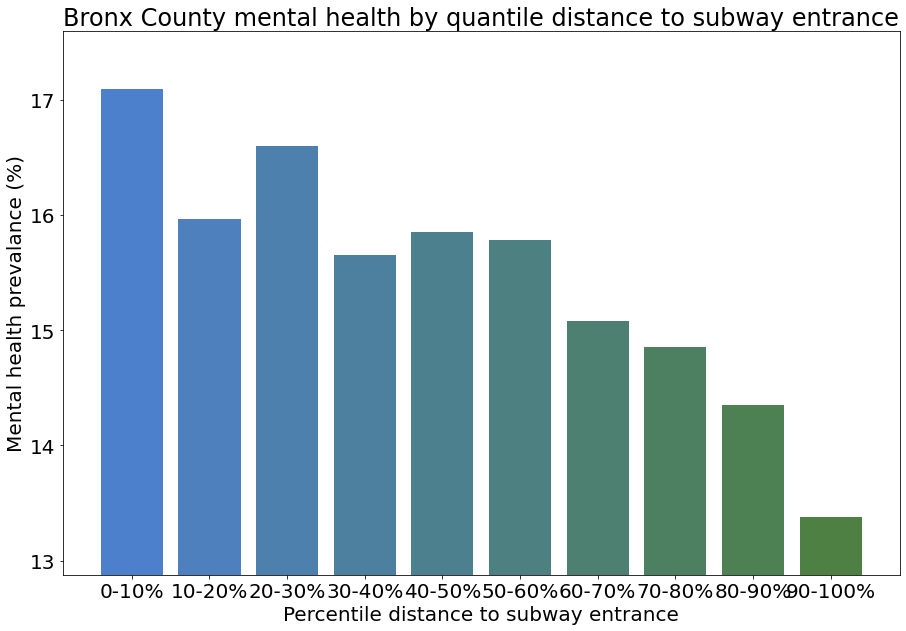

In [281]:
c  =[]
for i in range(10):
    c.append((0.3, 0.5, 0.8 - 0.06 * i))

for county in df_block.county.unique():  
    df_block_hist = df_block[['geometry', 'dist_to_subway', 'ment_hlth', 'popadjust']][df_block.county == county].copy()
    df_sort = df_block_hist.sort_values(by="dist_to_subway", ignore_index=True, ascending=True)
    df_sort.shape
    k = 10
    interval = df_sort.shape[0] // k
    data = []
    x = []
    for i in range(k):
        x.append(str(int(i * 100 / k)) + "-" + str(int((i+1)*100/k)) + "%")
        df_inter = df_sort[i*interval:(i+1)*interval]
        pop = df_inter.popadjust.mean()
        df_inter['ment_hlth_adj'] =  df_inter['ment_hlth'] * df_inter['popadjust'] / pop
        data.append(df_inter['ment_hlth_adj'].mean())
    data


    fig, ax = plt.subplots(figsize=(15,10))
    ax.bar(x, data, color=c)
    ax.set_ylabel('Mental health prevalance (%)')
    ax.set_xlabel('Percentile distance to subway entrance')
    ax.set_title(county + ' mental health by quantile distance to subway entrance')
    plt.rc('font', size=20)
    # ax.legend(title='Fruit color')
    ax.set_ylim([np.min(data) - 0.5, np.max(data) + 0.5])
    plt.show()

# df_block_hist['dist_to_subway']



In [223]:

df_line = df_block[['geometry', 'closest_entrance_id', 'closest_line', 'dist_to_subway', 'ment_hlth', 'popadjust']]
df_line = df_line.dropna()
df_line.shape

(6212, 6)

In [247]:
from collections import defaultdict
line_dict = defaultdict(list)
for i_block in range(df_line.shape[0]):
    s = df_line.iloc[i_block].closest_line
    lines = s.split('-')
    for line in lines:
        line_dict[line].append([df_line.iloc[i_block].ment_hlth, df_line.iloc[i_block].popadjust])
line_avg = []
for k in line_dict.keys():
    sumpop = 0
    ment = []
    for pair in line_dict[k]:
        sumpop += pair[1]
        ment.append(pair[0] * pair[1])
    # H train was renamed to S train
    if len(ment) < 10 or len(str(k)) > 1 or str(k) == 'H':
        continue
    ment = np.sum(ment) / sumpop
    line_avg.append([k, ment])
df_line_isolated = pd.DataFrame(line_avg, columns=['line', 'ment_hlth'])
df_line_isolated.head()


,line,ment_hlth
0,F,11.261877
1,7,11.457013
2,A,13.385476
3,B,13.700032
4,Q,11.326721


(22, 2)


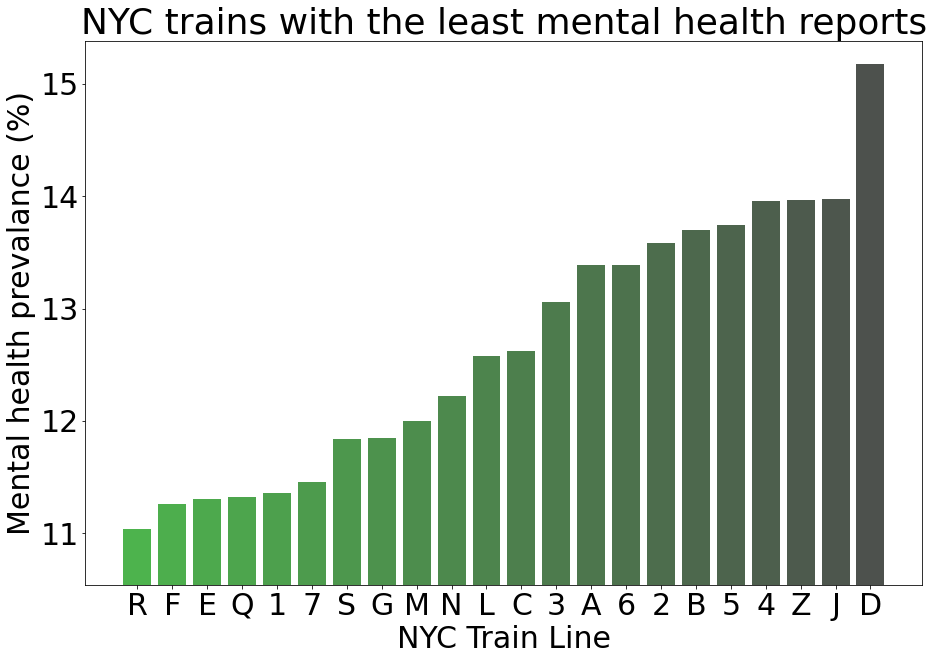

In [275]:
df_line_isolated = df_line_isolated.sort_values(by='ment_hlth')
print(df_line_isolated.shape)

n = 22
c  =[]
for i in range(n):
    c.append((0.3, 0.7 - (0.4 / n) * i, 0.3))

fig, ax = plt.subplots(figsize=(15,10))
ax.bar(df_line_isolated[:n].line, df_line_isolated[:n].ment_hlth, color=c)
ax.set_ylabel('Mental health prevalance (%)')
ax.set_xlabel('NYC Train Line')
ax.set_title('NYC trains with the least mental health reports')
plt.rc('font', size=30)
ax.set_ylim([np.min(df_line_isolated[:n].ment_hlth) - 0.5, np.max(df_line_isolated[:n].ment_hlth) + 0.2])
plt.show()

,ment_hlth
closest_line,
B-D-F-M,7.000000
E-F-M-R,8.115385
N-Q-R,8.388889
E-G-M-7,8.450000
N-Q-R-4-5-6,8.473684
...,...
A,13.585542
J-Z-4-5-6,13.625000
F-J-M-Z,13.841379


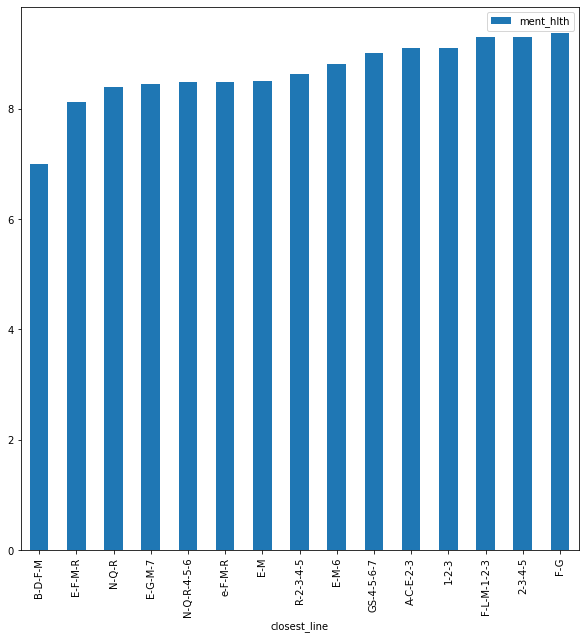

In [254]:
df_line_mean = df_line[['closest_line', 'ment_hlth']].groupby('closest_line').mean()
df_line_mean = df_line_mean.sort_values(by='ment_hlth')
df_line_mean.iloc[:15].plot.bar(figsize=(10, 10))
df_line_mean.head(-20)